# Базовые модели

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('russian'))
stop_words = stop_words.union(set([
    'это', 
    'очень', 
    'вообще', 
    'всё', 
    'ещё', 
    "просто", 
    "почему", 
    "которые",
    "который",
    "просто",
    "это",
    "пока",
    "хотя",
    "вроде",
    "тебе",
    "твой",
    "чтото",
    "такой",
    "такие",
    "такое",
]))

def custom_tokenizer(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text, language='russian')
    cleaned_tokens = []
    for t in tokens:
        if t not in stop_words and t.isalpha() and len(t) > 2:
            lemma = lemmatizer.lemmatize(t)
            cleaned_tokens.append(lemma)
    return cleaned_tokens

#### TfidVectorizer

In [4]:
tf_idf_vec = TfidfVectorizer(
    tokenizer=custom_tokenizer,
    min_df=1,
    max_df=0.8,
    ngram_range=(1, 3),
    max_features=5000,
    analyzer='char_wb',
    lowercase=True,
    encoding='utf-8'
)

#### CountVectorizer

In [5]:
count_vec = CountVectorizer(
    tokenizer=custom_tokenizer,
    min_df=1,
    max_df=0.8,
    ngram_range=(1, 3),
    max_features=5000,
    analyzer='char_wb',
    lowercase=True,
    encoding='utf-8'
)

In [6]:
df = pd.read_csv('../data/raw/labeled.csv')
train_df, test_df = train_test_split(df, random_state=42)

X_train = train_df['comment']
y_train = train_df['toxic']

X_test = test_df['comment']
y_test = test_df['toxic']

#### Logistic Regression

In [7]:
results = {}

Log reg + count vect

In [8]:
log_reg_count_reg_pipeline = Pipeline([
    ('count_vec', count_vec),
    ('classifier', LogisticRegression(max_iter=500, random_state=42))
])

log_reg_count_reg_pipeline.fit(X_train, y_train)
y_pred = log_reg_count_reg_pipeline.predict(X_test)

print(f'''
accuracy: {accuracy_score(y_test, y_pred)}
precision: {precision_score(y_test, y_pred)}
racall: {recall_score(y_test, y_pred)}
f1: {f1_score(y_test, y_pred)}
''')

results['lgcv'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'racall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred) 
}

c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:552: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(



accuracy: 0.8720510685539828
precision: 0.8056042031523643
racall: 0.7937877480586712
f1: 0.7996523250760539



Log reg + tf-idf

In [9]:
log_reg_tf_idf_pipeline = Pipeline([
    ('tf_idf_vec', tf_idf_vec),
    ('classifier', LogisticRegression(max_iter=500, random_state=42))
])

log_reg_tf_idf_pipeline.fit(X_train, y_train)
y_pred = log_reg_tf_idf_pipeline.predict(X_test)

print(f'''
accuracy: {accuracy_score(y_test, y_pred)}
precision: {precision_score(y_test, y_pred)}
racall: {recall_score(y_test, y_pred)}
f1: {f1_score(y_test, y_pred)}
''')

results['lgtfidf'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'racall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred) 
}

c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:552: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(



accuracy: 0.8884263114071607
precision: 0.8834853090172239
racall: 0.7523727351164797
f1: 0.8126747437092264



#### Naive Bayess 

NB + count vec

In [10]:
NB_count_vec_pipeline = Pipeline([
    ('count_vec', count_vec),
    ('classifier', MultinomialNB())
])

NB_count_vec_pipeline.fit(X_train, y_train)
y_pred = NB_count_vec_pipeline.predict(X_test)

print(f'''
accuracy: {accuracy_score(y_test, y_pred)}
precision: {precision_score(y_test, y_pred)}
racall: {recall_score(y_test, y_pred)}
f1: {f1_score(y_test, y_pred)}
''')

results['nbcv'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'racall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred) 
}

c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:552: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(



accuracy: 0.8665001387732445
precision: 0.7560422960725075
racall: 0.8636755823986195
f1: 0.806282722513089



NB + tf-idf

In [11]:
NB_tf_idf_vec_pipeline = Pipeline([
    ('tftf_idf_vec',tf_idf_vec),
    ('classifier', MultinomialNB())
])

NB_count_vec_pipeline.fit(X_train, y_train)
y_pred = NB_count_vec_pipeline.predict(X_test)

print(f'''
accuracy: {accuracy_score(y_test, y_pred)}
precision: {precision_score(y_test, y_pred)}
racall: {recall_score(y_test, y_pred)}
f1: {f1_score(y_test, y_pred)}
''')

results['nbtfidf'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'racall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred) 
}

c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:552: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(



accuracy: 0.8665001387732445
precision: 0.7560422960725075
racall: 0.8636755823986195
f1: 0.806282722513089



In [13]:
res_df = pd.DataFrame(results).T
res_df

,accuracy,precision,racall,f1
lgcv,0.872051,0.805604,0.793788,0.799652
lgtfidf,0.888426,0.883485,0.752373,0.812675
nbcv,0.866500,0.756042,0.863676,0.806283
nbtfidf,0.866500,0.756042,0.863676,0.806283


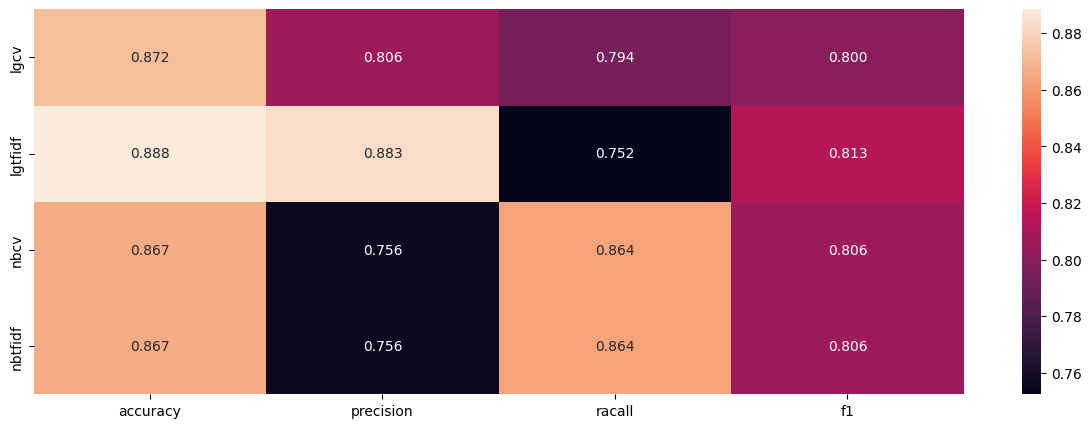

In [20]:
plt.figure(figsize=(15, 5))
sns.heatmap(res_df, annot=True, fmt='.3f')
plt.show()